In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('./survey_results_public.csv') 
df['Currency'] = df['Currency'].str.split('\t').str[0]
df['Currency'] = df['Currency'].str.split(' ').str[0]

df_currency_conv = pd.read_csv('./currency_conversion_rate.csv') \
.drop(columns = ['convert_from', 'to_foreign_rate'], axis = 1) \
.rename(columns={"convert_to": "Currency_Name", "convert_usd_to_foreign": "Currency_New","convert_foreign_to_usd":"Currency","to_usd_rate":"To_USD_Rate"}) \

df_currency_conv['Currency_New'] = df_currency_conv['Currency_New'].str.split(' ').str[0]
df_currency_conv['Currency'] = df_currency_conv['Currency'].str.split(' ').str[0]

In [2]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
# data has no duplicate rows

df.duplicated().sum()

0

In [4]:
df_currency_conv.head()

,Currency_Name,Currency_New,To_USD_Rate,Currency
0,Albanian Lek,USD,0.009,ALL
1,British Pound,USD,1.205,GBP
2,Bulgarian Lev,USD,0.543,BGN
3,Croatian Kuna,USD,0.141,HRK
4,Czech Koruna,USD,0.044,CZK


In [5]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print("The number of row {}, number of columns {}".format(num_rows,num_cols))

The number of row 73268, number of columns 79


In [6]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
print("Columns with no missing values {}".format(no_nulls))

Columns with no missing values {'MainBranch', 'ResponseId'}


In [7]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing

print("Provide a set of columns with more than 75% of the values missing {}".format(most_missing_cols))

Provide a set of columns with more than 75% of the values missing {'VCHostingProfessional use', 'VCHostingPersonal use'}


In [8]:
# Get only full-time developers data

df = df.loc[df['MainBranch'] == 'I am a developer by profession']

In [9]:
columns_lst = ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork','EdLevel','YearsCodePro', 'DevType'
              ,'OrgSize','Country', 'Currency','CompTotal', 'CompFreq','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith'
              ,'WebframeHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith',
              'OpSysProfessional use','OpSysPersonal use','VersionControlSystem','OfficeStackAsyncHaveWorkedWith',
              'OfficeStackSyncHaveWorkedWith','Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity']

df = df[columns_lst]

In [10]:
# select only columns related to technology experience and create dummies for them

col_to_str = ['Employment','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','VersionControlSystem','OfficeStackAsyncHaveWorkedWith','OfficeStackSyncHaveWorkedWith']

def get_dummy_df(col_list,sep,df):
    """
    Take multi-value columns in a df with separator and create dummy columns, then 
    concatenate the dummy columns to the df.
    
    Parameters:
        - col_list: List of columns to create dummies for.
        - sep: Separator between column values.
        - df: dataframe.
        
    Returns:
        - df: Dataframe with all dummy columns concatenated.
    """
    for col in col_list:
        dummy_col = df[col].str.get_dummies(sep=sep)
        df = pd.concat([df, dummy_col], axis=1, join="inner")
    return df


df = get_dummy_df(col_to_str,';',df)

In [11]:
# Create filter for the unemployed and employed part-time or multiple job respondents

is_open2wk = df['Not employed, but looking for work'] != 1
is_not_open2wk = df['Not employed, and not looking for work'] != 1
is_retired = df['Retired'] != 1
is_part_time_or_multi_jobs = df['Employed, part-time'] != 1

In [12]:
# Filter out the unemployed and employed part-time or multiple job respondents from df

df = df[is_retired & is_not_open2wk & is_open2wk & is_part_time_or_multi_jobs]

In [13]:
# Create filter for the fully employed or self-employed with compensation more than zero

emp_fulltime = df['Employed, full-time'] == 1

not_emp_fulltime = df['Employed, full-time'] == 0

free_la = df['Independent contractor, freelancer, or self-employed'] == 1

not_free_la = df['Independent contractor, freelancer, or self-employed'] == 0

nonzero_comp = df.CompTotal > 0

In [14]:
# Filter the df for only fully employed by a company and not self-employed or self-employed and not fully employed by a company.
df = df[((emp_fulltime & not_free_la)|(not_emp_fulltime & free_la)) & nonzero_comp]

In [15]:
# Filter out respondents who did not provide compensation

df = df.dropna(subset=['CompTotal'],how='all')

In [16]:
#Filter out respondents with compensation but no compensation frequency

df = df.dropna(subset=['CompFreq'],how='all')

In [17]:
# Join the exchange rate dataframe to get conversion rate

df = pd.merge(df,df_currency_conv,on="Currency")

In [18]:
#Convert all compensations to USD using the To_USD_Rate field and the CompTotal_New to create CompTotal_USD

df['CompTotal_USD'] = df['CompTotal'].multiply(df['To_USD_Rate'])

In [19]:
df_six_fig=df[(df['CompTotal_USD'] >= 100000) & (df['CompTotal_USD'] <= 999999)] #[['Country','Currency','CompTotal','CompTotal_USD','CompFreq']] \


In [20]:
df_six_fig.shape

(8452, 248)

In [21]:
tech_list = ['LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','VersionControlSystem','OfficeStackAsyncHaveWorkedWith','OfficeStackSyncHaveWorkedWith','MiscTechHaveWorkedWith']

nrows = len(tech_list)

In [22]:
def plot_tech(df,col_list,sep):
    """
    Loop over each dummy columns of a tech group and visualize the popularity in the df.
    
    Parameters:
        - col_list: List of columns used in creating dummies.
        - sep: Separator between column values.
        - df: dataframe.
        
    Returns:
        - None
    """
    for col,i in zip(col_list, range(len(tech_list))):
        dummy_col = df[col].str.get_dummies(sep=sep)
        
        dummy_col_names = pd.Series(dummy_col.columns)
        
        dummy_col_list = list(dummy_col_names.reindex(dummy_col_names.values).drop(["Other (please specify):","I don't use one"],errors='ignore').index)
        
        full_emp = df.groupby('Employment')[dummy_col_list].sum().T['Employed, full-time'].sort_values(ascending=False).head(10)
        
        plot_a = sns.barplot(x=full_emp.index, y=full_emp.values,ax=axes[i,0])
        
        plot_a.set_xticklabels(labels =list(pd.Series(full_emp.index).drop_duplicates()), rotation=90)
        
        ind_df = df.groupby('Employment')[dummy_col_list].sum().T['Independent contractor, freelancer, or self-employed'].sort_values(ascending=False).head(10)
          
        plot_b = sns.barplot(ax=axes[i,1], x=ind_df.index, y=ind_df.values)
              
        plot_b.set_xticklabels(labels =list(pd.Series(ind_df.index).drop_duplicates()), rotation=90)  
        
        axes[i,0].set_ylabel( col , size =14, rotation=0, labelpad=120)


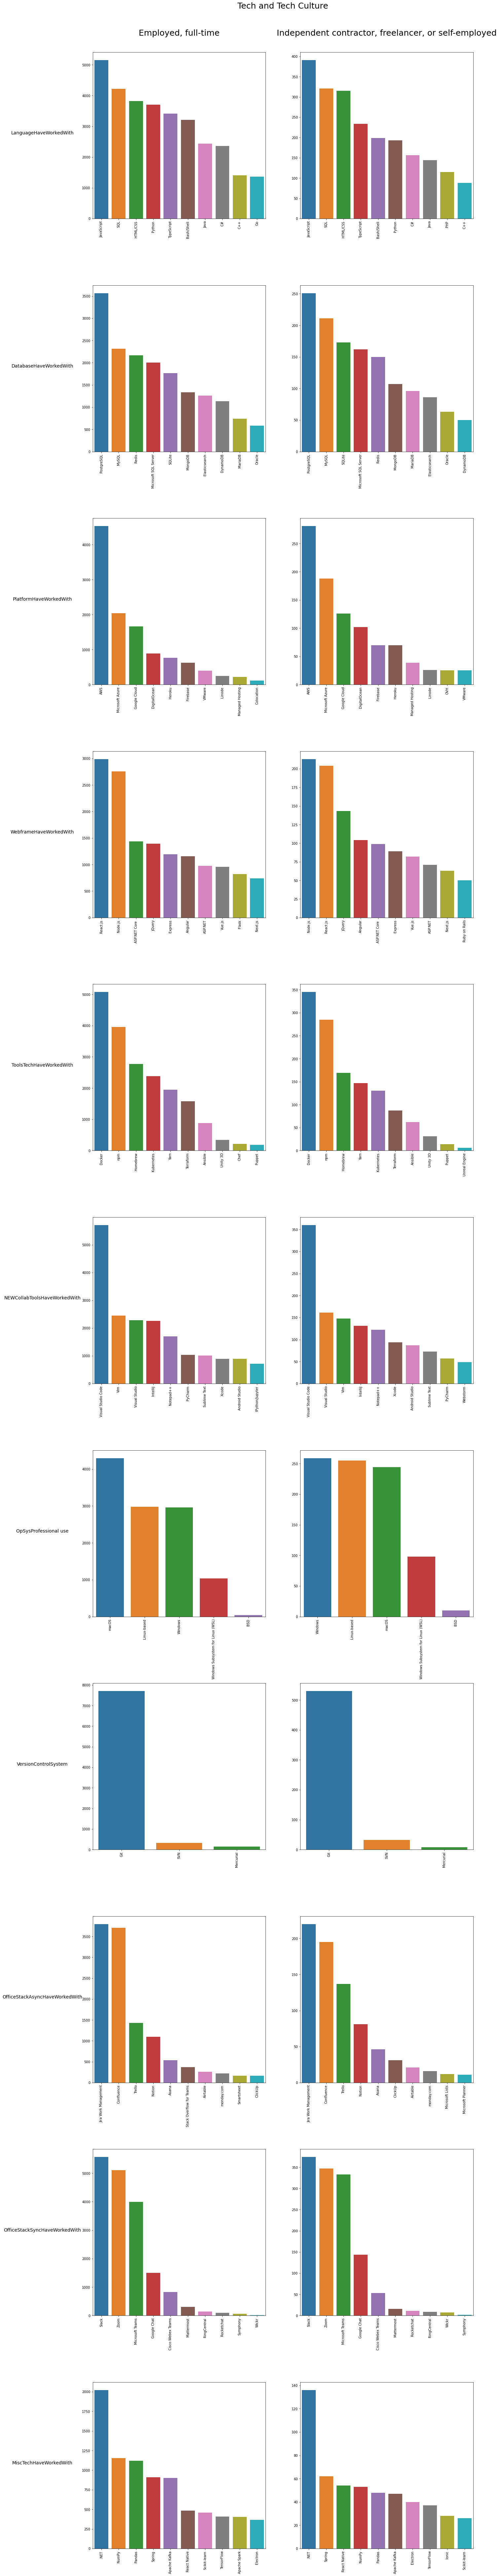

In [23]:
fig, axes = plt.subplots(nrows, 2,figsize=(20,70), sharex=False,sharey=False)
fig.suptitle('Tech and Tech Culture',y=1.63,fontsize=25)
plot_tech(df_six_fig,tech_list,';')

axes[0,0].set_title('Employed, full-time', fontsize = 25, pad = 50)
axes[0,1].set_title('Independent contractor, freelancer, or self-employed', fontsize = 25, pad = 50)

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.6,wspace=0.2,hspace=0.4)

plt.show()
fig.tight_layout()